In [1]:
from matplotlib import pyplot as plt
from random import randint
from scripts.utils import *
from scripts.train_functions import single_model_eval


# Visualize for exoromper

In [2]:
dataset_root_dir = 'datasets/exoromper/'
dataset = PyTorchExoRomperDataset('space', dataset_root_dir, debug_mode=False)

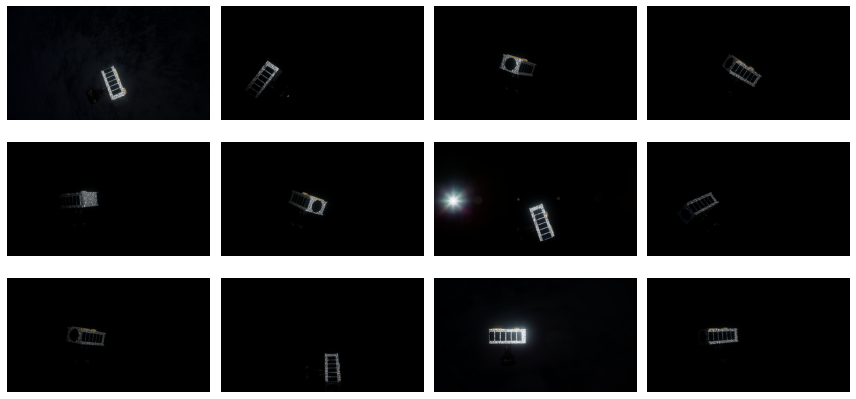

In [3]:
rows = 3
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
for i in range(rows):
    for j in range(cols):
        img = dataset.get_image(randint(0, len(dataset)-1))
        axes[i][j].imshow(img)
        axes[i][j].axis('off')
fig.tight_layout()
        

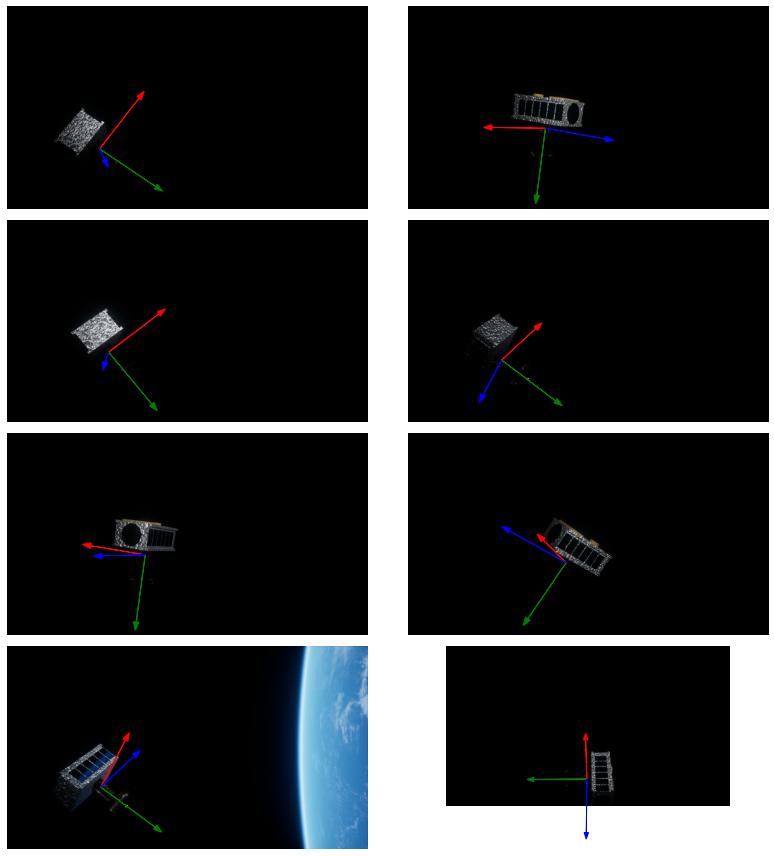

In [4]:
rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
for i in range(rows):
    for j in range(cols):
        dataset.visualize(randint(0, len(dataset)-1), ax=axes[i][j])
        axes[i][j].axis('off')
fig.tight_layout()

### Visualize model predictions

CUDA IS AVAILABLE?  True
CUDA IS AVAILABLE?  True
CUDA IS AVAILABLE?  True
CUDA IS AVAILABLE?  True
CUDA IS AVAILABLE?  True
CUDA IS AVAILABLE?  True
CUDA IS AVAILABLE?  True
CUDA IS AVAILABLE?  True


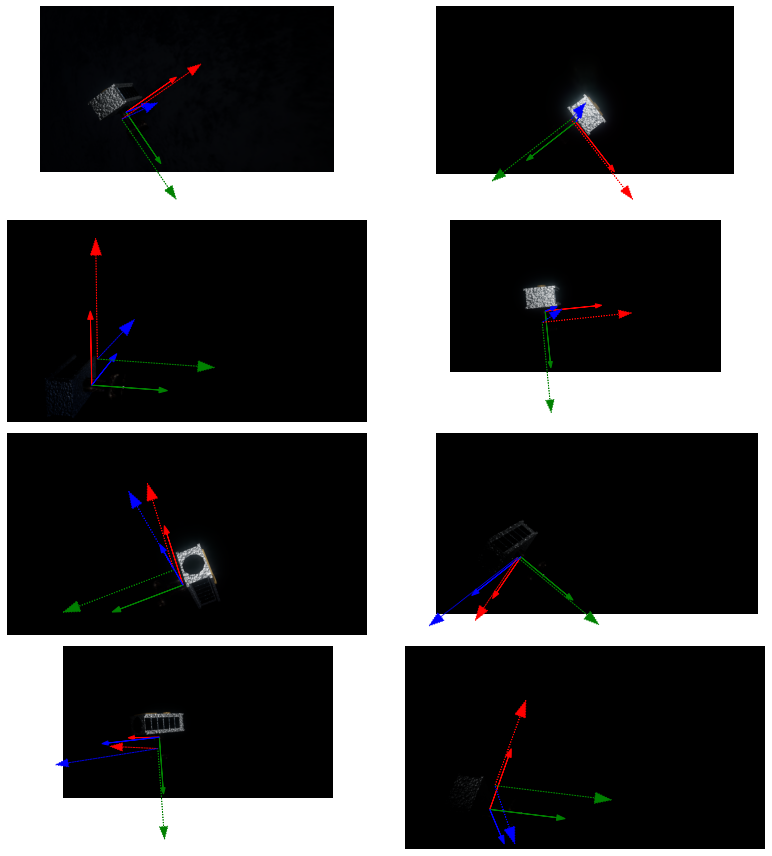

In [6]:
load_model_path = './best_model/ex_v5_best_model.pt'

rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
for i in range(rows):
    for j in range(cols):
        idx = randint(0, len(dataset)-1)
        dataset.visualize(idx, ax=axes[i][j])
        img, lbl, fname = dataset[idx]
        # q_true = lbl[0:4]
        # r_true = lbl[4:]
        # q_pred, r_pred = single_model_eval(load_model_path, img)
        r_pred = single_model_eval(load_model_path, img, position_only=True)
        dataset.plot_arrows(q=None, r=r_pred, ax=axes[i][j], i=idx)
        axes[i][j].axis('off')
fig.tight_layout()

# Visualizing Samples and Labels of the SPEED Dataset

This notebook helps to inspect the SPEED dataset. You can see samples from the dataset, with the corresponding ground truth labels visualized as projected axes.

Let's set up the path to a local copy of the SPEED dataset, and instanciate the helper class.

In [6]:
dataset_root_dir = '../speed'
dataset = SatellitePoseEstimationDataset(root_dir=dataset_root_dir)

First we show a number of random images from the dataset.

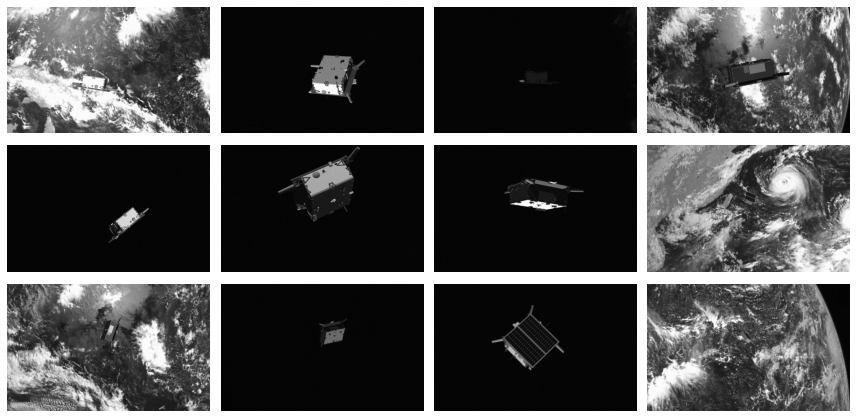

In [7]:
rows = 3
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
for i in range(rows):
    for j in range(cols):
        img = dataset.get_image(randint(0, 12000))
        axes[i][j].imshow(img)
        axes[i][j].axis('off')
fig.tight_layout()
        

---

We can visualize the pose labels with projecting axes on the samples. The correspondence between colors and directions in the satellite body frame is: red - x, green - y, blue - z.

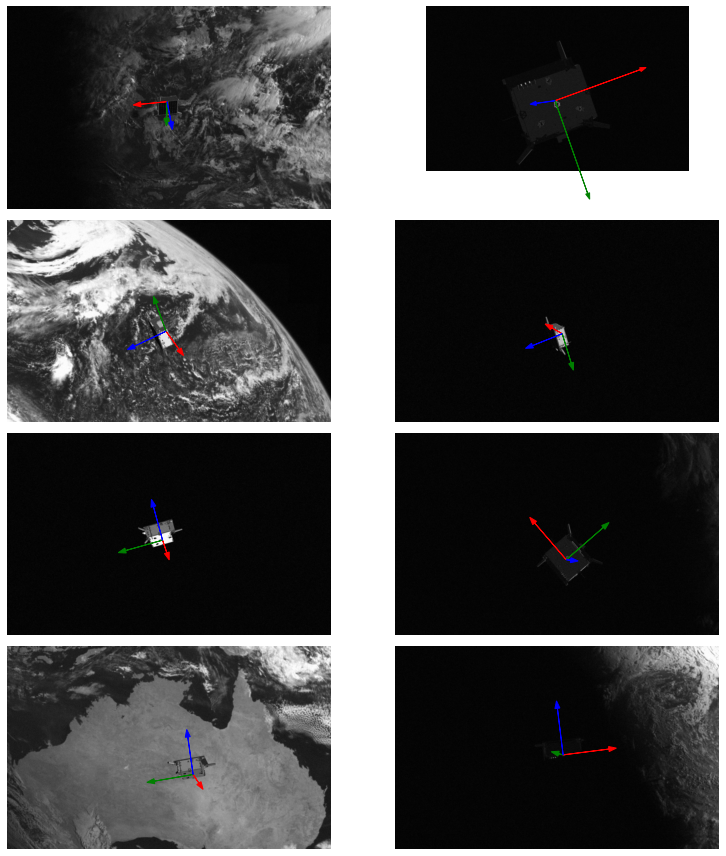

In [8]:
rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
for i in range(rows):
    for j in range(cols):
        dataset.visualize(randint(0, 12000), ax=axes[i][j])
        axes[i][j].axis('off')
fig.tight_layout()

TypeError: 'SatellitePoseEstimationDataset' object is not subscriptable

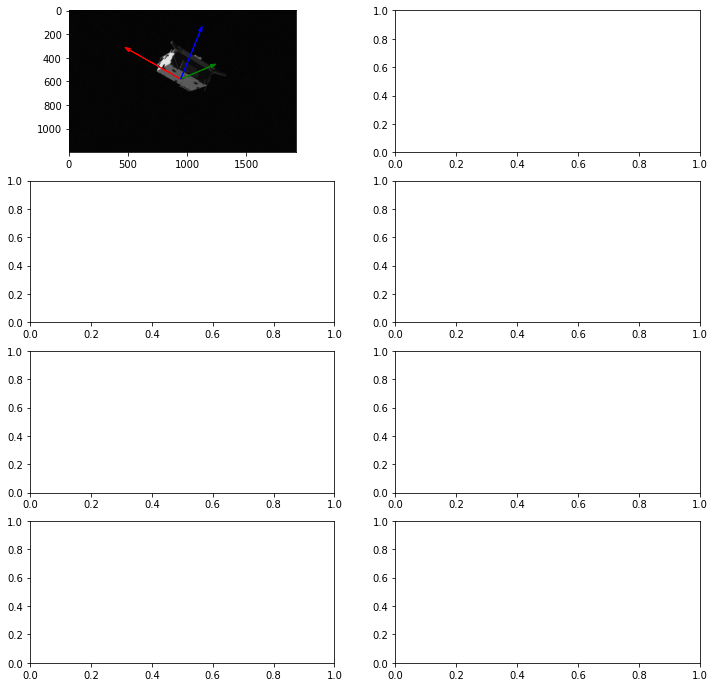

In [10]:
load_model_path = './best_model/images_1000_fixed_seed_best_model.pt'

rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
for i in range(rows):
    for j in range(cols):
        idx = randint(0, 1000-1)
        dataset.visualize(idx, ax=axes[i][j])
        img, lbl, fname = dataset[idx]
        # q_true = lbl[:4]
        # r_true = lbl[4:]
        q_pred, r_pred = single_model_eval(load_model_path, img) # TODO
        dataset.plot_arrows(q_pred, r_pred, ax=axes[i][j])
        axes[i][j].axis('off')
fig.tight_layout()